In [2]:
import pandas as pd
import seaborn as sns #for graphical representation of the data we got it from pandas
import matplotlib.pyplot as plt #to represent the data into map form
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


In [3]:
df = pd.read_csv(r"D:\Programing\DataScience\DataCleaning\Personality_Analysis\personality_dataset.csv")
df.head(3)


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,NaN,No,4.0,6.0,No,NaN,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,NaN


In [4]:
df.isnull().sum()# null values

Time_spent_Alone             64
Stage_fear                   74
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    53
Friends_circle_size          78
Post_frequency               65
Personality                   2
dtype: int64

In [5]:
df.isnull().sum().sum()#total null valaue present inside a data set

464

In [6]:
(df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100 #to find the total no of null

2.0

In [7]:
(df.isnull().sum()/df.shape[0])*100 #percentage of null value

Time_spent_Alone             2.206897
Stage_fear                   2.551724
Social_event_attendance      2.137931
Going_outside                2.275862
Drained_after_socializing    1.827586
Friends_circle_size          2.689655
Post_frequency               2.241379
Personality                  0.068966
dtype: float64

In [8]:
df.notnull().sum() #values that are not null

Time_spent_Alone             2836
Stage_fear                   2826
Social_event_attendance      2838
Going_outside                2834
Drained_after_socializing    2847
Friends_circle_size          2822
Post_frequency               2835
Personality                  2898
dtype: int64

In [9]:
df.shape

(2900, 8)

In [10]:
df.notnull().sum().sum()#total value of not null

22736

For heat maps

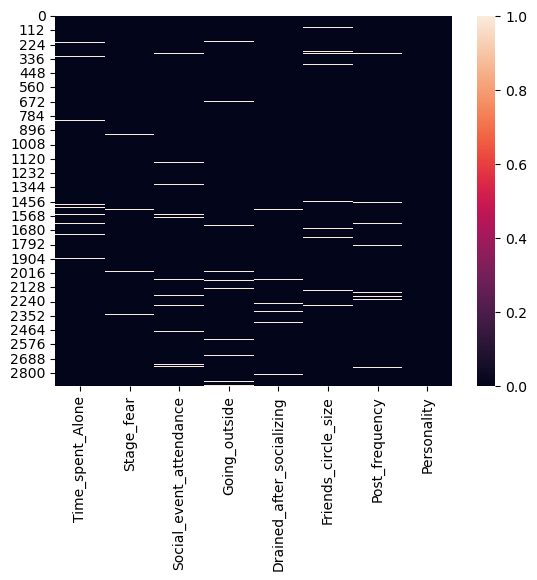

In [11]:
sns.heatmap(df.isnull())
plt.show()

Deletion of the cells 

In [12]:
# df.drop(columns=["Stage_fear"]) #Drops the column but returns a new DataFrame

# df.drop(columns=["Stage_fear"],inplace=True) #Drops the column in-place (modifies df directly)

# df.dropna(inplace=True) #it deletes aqll the null values
# ((2900-2538)/2901)*100 # it shows that around 12.4 percent data is removed whcih is too much

Now we are going to use Fillna methods
there are three methods to fill categorical(String type data or in ML its object tyoe of data) data 
1) backward filling
2) forward filling
3) mode filling (speially used for object data type)

In [13]:
df.head(11)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,NaN,No,4.0,6.0,No,NaN,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,NaN
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,NaN
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,NaN,9.0,NaN,No,7.0,7.0,Extrovert
7,2.0,No,8.0,4.0,No,7.0,8.0,Extrovert
8,10.0,Yes,1.0,3.0,NaN,0.0,3.0,Introvert
9,0.0,No,8.0,6.0,No,13.0,8.0,Extrovert


In [14]:
# df.bfill().head(10) #fills the details in the below null value's value.(but the value is filled row wise)
#df.bfill(axis=1).head(10) #fills the details in the below null value's value.(but the value is filled column wise)

In [15]:
# df.ffill().head(10) #fills the details in the before null value's value.(row wise)
#df.ffill(axis=1).head(10) #fills the details in the before null value's value.(column wise)

In [16]:
# Mode is used for any particular or single column.
# df["Stage_fear"].mode()[0] #used to select the mode of column.
# df["Stage_fear"].fillna(df["Stage_fear"].mode()[0]) #used to fill the column with the selected mode but dosent update the original df.
# df["Stage_fear"].fillna(df["Stage_fear"].mode()[0],inplace=True)  """used to fill the column with the selected mode and update the original df.
# we can do one by one tracing of object columns and then transforming its data but there are many other ways as well or one universal way """"


In [17]:
df.head(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,NaN,No,4.0,6.0,No,NaN,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,NaN
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,NaN
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,NaN,9.0,NaN,No,7.0,7.0,Extrovert
7,2.0,No,8.0,4.0,No,7.0,8.0,Extrovert
8,10.0,Yes,1.0,3.0,NaN,0.0,3.0,Introvert
9,0.0,No,8.0,6.0,No,13.0,8.0,Extrovert


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2836 non-null   float64
 1   Stage_fear                 2826 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2847 non-null   object 
 5   Friends_circle_size        2822 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2898 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [19]:
# df.select_dtypes(include="object").isnull().sum() #tells me about the values which are null from object data type

# df.select_dtypes(include="object").isnull().columns # it give the lisgt of the attributes which are of object datatype and are null as well

for i in df.select_dtypes(include="object").isnull().columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

now from skitlearn we can do the same filling of missed data 

In [20]:
df.select_dtypes(include="float64").isnull().columns

Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')

In [21]:
si = SimpleImputer(strategy="mean")
cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside','Friends_circle_size', 'Post_frequency']
df[cols]=si.fit_transform(df[cols])
df[cols]


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,4.505994,4.0,6.0,6.266478,5.0
1,9.000000,0.0,0.0,0.000000,3.0
2,9.000000,1.0,2.0,5.000000,2.0
3,0.000000,6.0,7.0,14.000000,8.0
4,3.000000,9.0,4.0,8.000000,5.0
...,...,...,...,...,...
2895,3.000000,7.0,6.0,6.000000,6.0
2896,3.000000,8.0,3.0,14.000000,9.0
2897,4.000000,1.0,1.0,4.000000,0.0
2898,11.000000,1.0,3.0,2.000000,0.0


In [22]:
df.head(11)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.505994,No,4.0,6.0,No,6.266478,5.0,Extrovert
1,9.000000,Yes,0.0,0.0,Yes,0.000000,3.0,Introvert
2,9.000000,Yes,1.0,2.0,Yes,5.000000,2.0,Extrovert
3,0.000000,No,6.0,7.0,No,14.000000,8.0,Extrovert
4,3.000000,No,9.0,4.0,No,8.000000,5.0,Extrovert
5,1.000000,No,7.0,5.0,No,6.000000,6.0,Extrovert
6,4.000000,No,9.0,3.0,No,7.000000,7.0,Extrovert
7,2.000000,No,8.0,4.0,No,7.000000,8.0,Extrovert
8,10.000000,Yes,1.0,3.0,No,0.000000,3.0,Introvert
9,0.000000,No,8.0,6.0,No,13.000000,8.0,Extrovert


Hot-Encoding using pandas and its function dummies
-> in this what we we will bve the output as boolean value then by using dtype=int we will make it to binary representation


In [23]:
en_data=df[["Stage_fear","Personality"]]
# pd.get_dummies(en_data,dtype=int)

In [24]:
# pd.get_dummies(en_data,dtype=int).info() 

One Hot Encoding 
-> by using sklearn prepossesing import oneHotEncoding 

In [25]:
ohe = OneHotEncoder(drop='first') ;""" here drop first means that two attribute with neganive one like stage fear no and exprovert will be deleted 
and if we dont use it then it would give 4 column matrix"""
ohe.fit_transform(en_data)#it creates sparse matrix in which values are generally filled using 0 and 1
ar = ohe.fit_transform(en_data).toarray() #we have changed it to array but we want it to be in dataframe so for that we willl do the next step
ar

array([[0., 0.],
       [1., 1.],
       [1., 0.],
       ...,
       [1., 1.],
       [1., 1.],
       [0., 0.]])

In [26]:
df[["Stage_fear_Yes","Personality_Introvert"]]=pd.DataFrame(ar,columns=["Stage_fear_Yes","Personality_Introvert"])
df.head(11)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Stage_fear_Yes,Personality_Introvert
0,4.505994,No,4.0,6.0,No,6.266478,5.0,Extrovert,0.0,0.0
1,9.000000,Yes,0.0,0.0,Yes,0.000000,3.0,Introvert,1.0,1.0
2,9.000000,Yes,1.0,2.0,Yes,5.000000,2.0,Extrovert,1.0,0.0
3,0.000000,No,6.0,7.0,No,14.000000,8.0,Extrovert,0.0,0.0
4,3.000000,No,9.0,4.0,No,8.000000,5.0,Extrovert,0.0,0.0
5,1.000000,No,7.0,5.0,No,6.000000,6.0,Extrovert,0.0,0.0
6,4.000000,No,9.0,3.0,No,7.000000,7.0,Extrovert,0.0,0.0
7,2.000000,No,8.0,4.0,No,7.000000,8.0,Extrovert,0.0,0.0
8,10.000000,Yes,1.0,3.0,No,0.000000,3.0,Introvert,1.0,1.0
9,0.000000,No,8.0,6.0,No,13.000000,8.0,Extrovert,0.0,0.0


Label Encoding  
categorical data is devided into 1.nominal data 2.ordinal data 
1) nominal data -> the names/labels or attributes which dosent have any interconnection these canor be taken average, there categories cannot be ranked or ordered logically, we can count frequency only.
2) ordinal data -> 

In [27]:
la = LabelEncoder()
la.fit(df["Drained_after_socializing"])

LabelEncoder()

In [28]:
df["Drained_after_socializing"] = la.transform(df["Drained_after_socializing"])
df.head(11)


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Stage_fear_Yes,Personality_Introvert
0,4.505994,No,4.0,6.0,0,6.266478,5.0,Extrovert,0.0,0.0
1,9.000000,Yes,0.0,0.0,1,0.000000,3.0,Introvert,1.0,1.0
2,9.000000,Yes,1.0,2.0,1,5.000000,2.0,Extrovert,1.0,0.0
3,0.000000,No,6.0,7.0,0,14.000000,8.0,Extrovert,0.0,0.0
4,3.000000,No,9.0,4.0,0,8.000000,5.0,Extrovert,0.0,0.0
5,1.000000,No,7.0,5.0,0,6.000000,6.0,Extrovert,0.0,0.0
6,4.000000,No,9.0,3.0,0,7.000000,7.0,Extrovert,0.0,0.0
7,2.000000,No,8.0,4.0,0,7.000000,8.0,Extrovert,0.0,0.0
8,10.000000,Yes,1.0,3.0,0,0.000000,3.0,Introvert,1.0,1.0
9,0.000000,No,8.0,6.0,0,13.000000,8.0,Extrovert,0.0,0.0


to solve the Ordinal data 
1) by using map library of python
2) by using sklearn 
but here we can use ordinal as we dont have data in this form (low, high, moderate)